In [16]:
from sklearn import datasets, model_selection, svm, preprocessing, pipeline, metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dd = datasets.load_digits()
dd.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
X = dd["data"]
X.shape

(1797, 64)

In [6]:
y = dd["target"]
y.shape

(1797,)

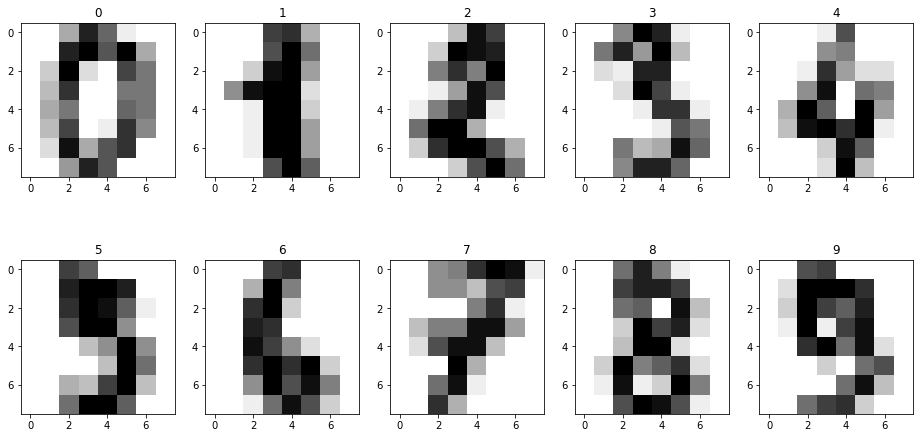

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
for ax, im, digit in zip(axes.flat, X, y):
    ax.imshow(im.reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set(title=f"{digit}")

In [11]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=.3, random_state=0)

In [13]:
model = svm.SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.47222222222222221

In [15]:
ocr = pipeline.Pipeline([("normalize", preprocessing.StandardScaler()),
                         ("classify", svm.SVC())])
ocr.fit(X_train, y_train)
ocr.score(X_test, y_test)

0.98518518518518516

In [17]:
y_pred = ocr.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 53,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 52,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 60,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 56]])

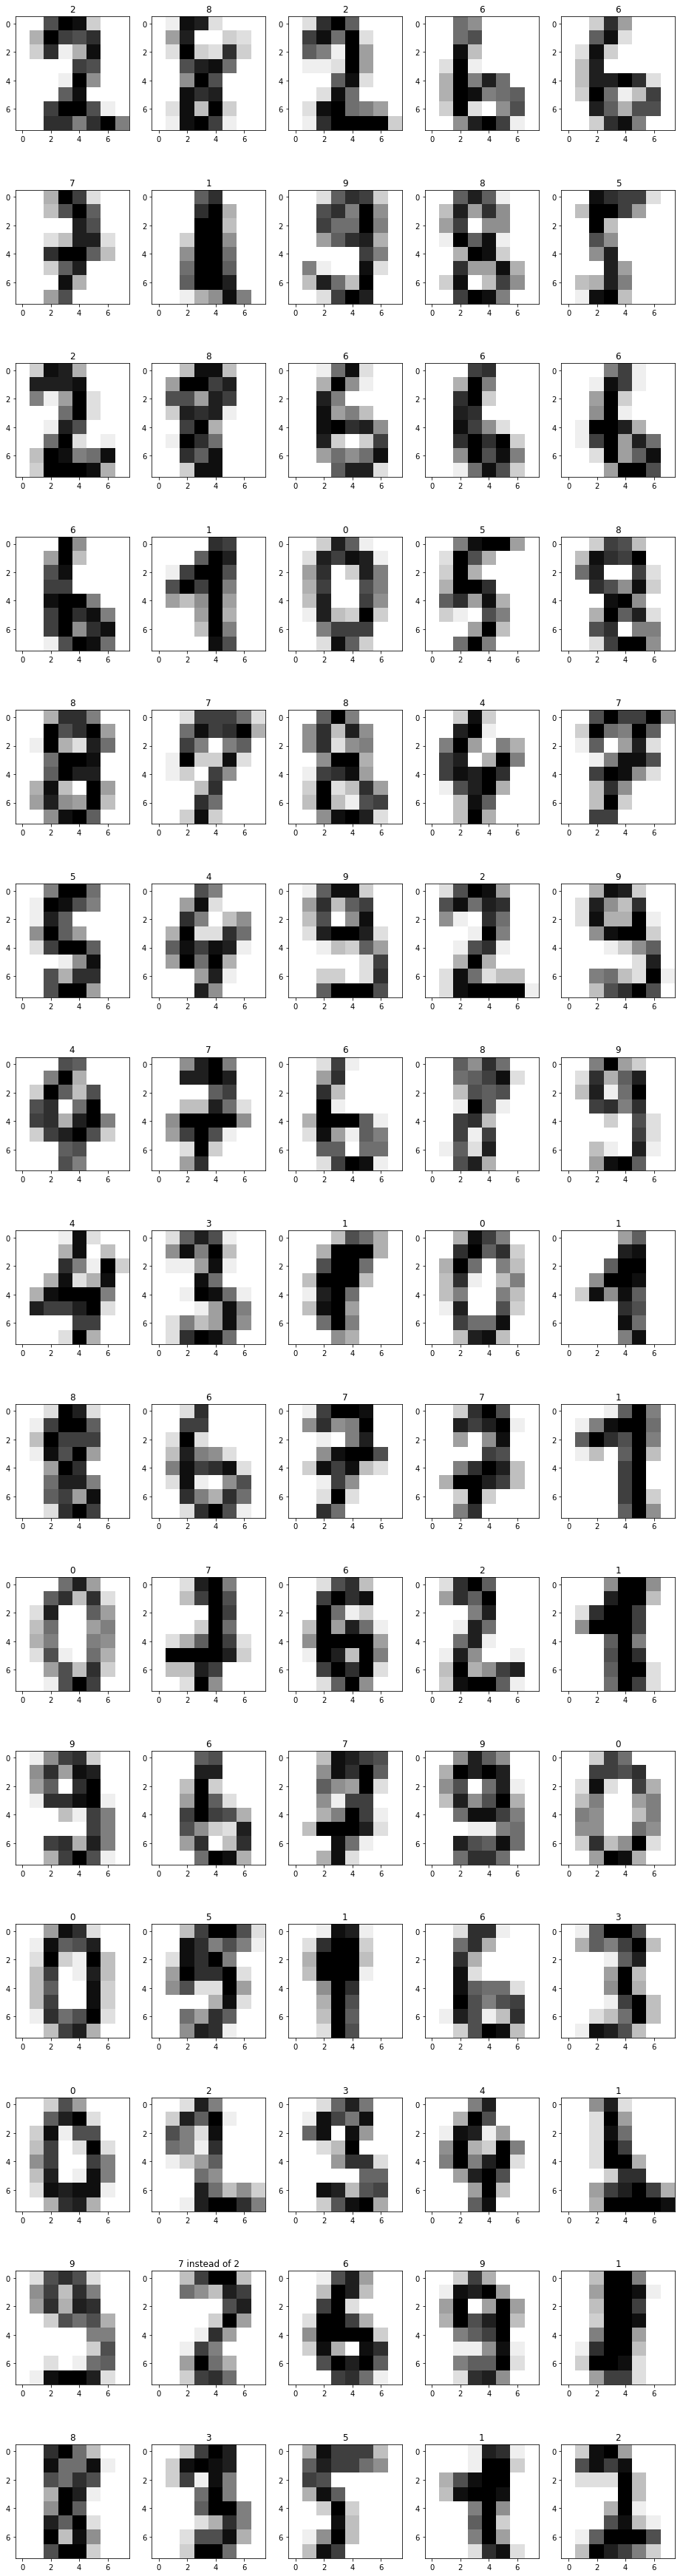

In [18]:
fig, axes = plt.subplots(nrows=15, ncols=5, figsize=(16, 64))
for ax, im, digit, predict in zip(axes.flat, X_test, y_test, y_pred):
    ax.imshow(im.reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set(title=f"{digit}" if digit == predict else f"{predict} instead of {digit}")